In [36]:
import numpy as np
from scipy import optimize
import scipy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

### 1D optimization

min $f(x) = - exp \left(-(x-0.7)^2 \right)$

In [9]:
# def f(x):
#     return -np.exp(-(x-0.7)**2)

f = lambda x: -np.exp(-(x-0.7)**2)

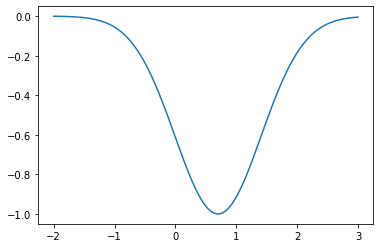

In [21]:
x = np.linspace(-2,3,100)
plt.plot(x, f(x));

In [16]:
res = optimize.minimize_scalar(f) # uses Brent
print(res.success) # check is solver was successful
x_min = res.x
print(x_min)
print(x_min - 0.7)

True
0.6999999997839409
-2.160590595323697e-10


Brent on cvx func - converges in 3 iterations:

Converged at  6


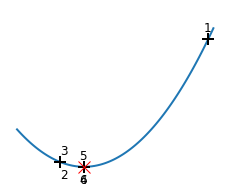

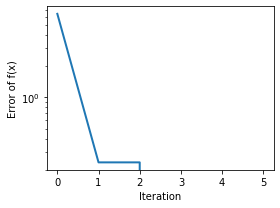

In [47]:
x = np.linspace(-1,3,100)
x_0 = np.exp(-1)

f = lambda x: (x - x_0)**2

plt.figure(figsize=(3, 2.5))
plt.axes([0,0,1,1])
# a convex function
plt.plot(x, f(x), linewidth=2);
# apply Brent method. To have access to the iteration, do this
# in an artificialway: allow the algo to iter only once
all_x = list()
all_y = list()
for iter in range(30):
    res = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method='Brent', options={'maxiter':iter})
    if res.success:
        print('Converged at ', iter)
        break
    this_x = res.x
    all_x.append(this_x)
    all_y.append(f(this_x))
    if iter < 6:
        plt.text(this_x - .05*np.sign(this_x) - .05, \
                f(this_x) + 1.2*(.3 - iter % 2), iter + 1, size=12)
        
plt.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)
plt.plot(all_x[-1], all_y[-1], 'rx', markersize=12)
plt.axis('off')
plt.ylim(ymin=-1, ymax=8)
plt.figure(figsize=(4, 3))
plt.semilogy(np.abs(all_y-all_y[-1]), linewidth=2)
plt.ylabel('Error of f(x)')
plt.xlabel('Iteration')
plt.tight_layout()        

### Optimization of 2-D params function
$f(x,y) = \frac{1}{2}(1-x^2) + (x-y^2)^2$

In [100]:
f = lambda x: 0.5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

In [56]:
# make a grid to evaluate function
x = np.linspace(-2,2)
y = np.linspace(-1,1)
xg, yg = np.meshgrid(x,y)

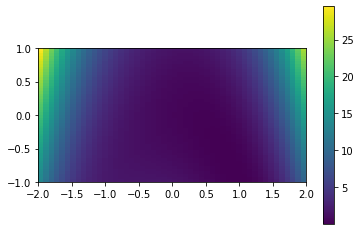

In [61]:
# simple 2D vizualisation
plt.figure()
plt.imshow(f([xg, yg]), extent=[-2,2,-1,1])
plt.colorbar();

In [7]:
def plot3d(f, x_dom, y_dom):
    
    # make a grid to evaluate function
    x = np.linspace(x_dom[0],x_dom[1])
    y = np.linspace(y_dom[0],y_dom[1])
    xg, yg = np.meshgrid(x,y)
    
    # 3D surface plot
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(xg, yg, f([xg, yg]), rstride=1, cstride=1,
                           cmap=plt.cm.jet, linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title('f');

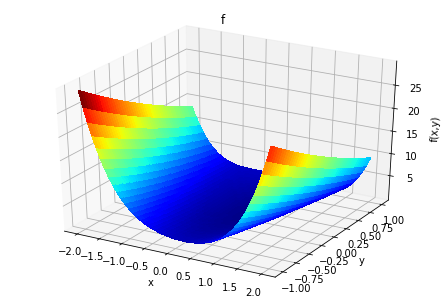

In [102]:
plot3d(f, [-2,2], [-1,1])

### Conjugate-Gradient descent
- gradient descent algos are toys not practical
- tends to oscillate accross a valley fllowing the gardient direction that makes it cross the valley
- the conjugate gradient solves the issue by adding a *friction term so that sharp turns are reduced*

In [75]:
optimize.minimize(f, [2,1], method='CG')

     fun: 5.426843148725793e-13
     jac: array([ 2.44901532e-06, -1.36171162e-06])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 8
    njev: 16
  status: 0
 success: True
       x: array([0.99999963, 0.99999857])

Gradient methods perform better if we pass gradient or jacobian (otw compute it numerically)

In [83]:
jaco = lambda x: np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [84]:
optimize.minimize(f, [2,1], method='CG', jac=jaco)

     fun: 2.957865890641887e-14
     jac: array([ 7.18259502e-07, -2.99030306e-07])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 8
    njev: 16
  status: 0
 success: True
       x: array([1.00000012, 1.00000009])

Note that function was only evaluated 16 times, compared to 64 without the gradient 

### Newton methods: 
- use the Hessian (to compute the jump direction)
- Quasi-Newton approx the Hessian on the fly (e.g. BFGS) 

In [85]:
optimize.minimize(f, [2,1], method='Newton-CG', jac=jaco)

     fun: 4.030080667130872e-18
     jac: array([-1.05095055e-09, -8.61020588e-10])
 message: 'Optimization terminated successfully.'
    nfev: 9
    nhev: 0
     nit: 8
    njev: 38
  status: 0
 success: True
       x: array([1.        , 0.99999999])

Note that compared to a conjugate gradient (above), Newton’s method has required less function evaluations, but more gradient evaluations, as it uses it to approximate the Hessian.

In [86]:
hes = lambda x: np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

In [89]:
optimize.minimize(f, [2,1], method='Newton-CG', jac=jaco, hess=hes)

     fun: 8.890464804458894e-18
     jac: array([-6.05743469e-10, -1.71629266e-09])
 message: 'Optimization terminated successfully.'
    nfev: 9
    nhev: 8
     nit: 8
    njev: 16
  status: 0
 success: True
       x: array([1.        , 0.99999999])

Quasi-Newton: BFGS (refined the hessian approx at each step)

In [90]:
optimize.minimize(f, [2,1], method='BFGS', jac=jaco)

      fun: 1.3490824057987792e-12
 hess_inv: array([[0.89726871, 1.76333236],
       [1.76333236, 3.95479325]])
      jac: array([-3.22002175e-07,  9.15789366e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([1.00000151, 1.00000348])

check that my gradient is correct: $||mine - numerical||$

In [93]:
optimize.check_grad(f, jac, [0,1])

3.332000937312528e-08

## Optimization with constraints
https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/optimize.html

### Box bounds

$$f(x,y) = \sqrt{\left( x-3\right)^2 + \left( y-2\right)^2 }$$

In [103]:
f = lambda x: np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

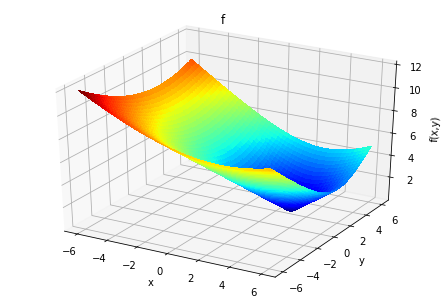

In [108]:
plot3d(f, [-6,6], [-6,6])

In [97]:
optimize.minimize(f, [0,0], bounds=((-1.5, 1.5), (-1.5, 1.5)))

      fun: 1.5811388300841898
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.94868331, -0.31622778])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([1.5, 1.5])

### Constraint optimization: vizualising the geometry

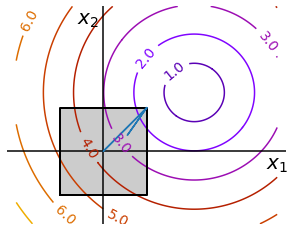

In [123]:
x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

plt.figure(figsize=(5, 4))
contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                        extent=[-3, 6, -2.5, 5],
                        cmap=plt.cm.gnuplot)
plt.clabel(contours,
            inline=1,
            fmt='%1.1f',
            fontsize=14)

plt.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
            [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)

plt.fill_between([ -1.5,  1.5],
                [ -1.5, -1.5],
                [  1.5,  1.5],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 4.4, '$x_2$', size=20)
plt.text(5.6, -.6, '$x_1$', size=20)
plt.axis('equal')
plt.axis('off');

# Add the optimization path
accumulator = list()
def f(x):
    # store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

# # We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.minimize(f, np.array([0, 0]), method="L-BFGS-B",
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:,0], accumulated[:,1]);

### General constraints

\begin{equation*}
\begin{aligned}
 \underset{x,y}{\text{min}}
 \; f(x,y) = \sqrt{\left( x-3\right)^2 + \left( y-2\right)^2 } \\
 \text{s.t.}
\; 1.5 - \left\Vert\left(x,y\right) \right\Vert_1 \geq 0
\end{aligned}
\end{equation*}

```scipy.optimize.fmin_slsqp()``` Sequential least square programming: equality and inequality constraints:

In [129]:
def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

In [132]:
x0 = np.array([0,0])
optimize.minimize(f, x0, constraints={'fun':constraint, 'type': 'ineq'})

     fun: 2.4748737350428893
     jac: array([-0.70708781, -0.70712575])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.25004693, 0.24995307])

### Exercice 1
$\left \{ \begin{array}{l} \min_{x,y} \left \{ x^2 + y^2 - xy + y \right \}  \\ s.t. \; x + 2y = 1 \end{array}\right .$

In [8]:
f = lambda x: x[0]**2 + x[1]**2 - x[0]*x[1] + x[1]

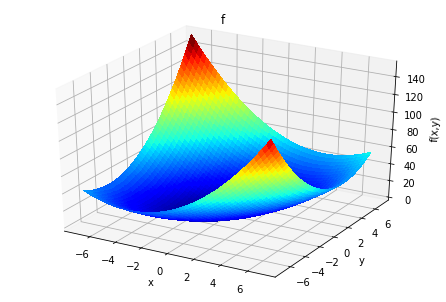

In [11]:
plot3d(f, [-7,7], [-7,7])

In [3]:
jac = lambda x: np.array((2*x[0] - x[1], 2*x[0] - x[1] + 1))

In [17]:
import random
x0 = np.array([random.random(),random.random()])
cons = {'fun':lambda x: np.atleast_1d(x[0] + 2*x[1] -1),
        'jac':lambda x: np.array([1.,2.]),
        'type': 'eq'}

optimize.minimize(f, x0, jac=jac, constraints=cons)

     fun: 0.4799999999999999
     jac: array([1., 2.])
 message: 'Optimization terminated successfully.'
    nfev: 2
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.6, 0.2])

### Exercice 2
#### Simulation, regression, estimation via Max Likelihood
- simulate $Y = 3X_1 - 2X_2 + 2 - \epsilon \;\text{where} \; X_1, X_2, \epsilon \sim N(0,1)$

In [51]:
N = 10000
X1_X2_eps = np.random.randn(N,3)
Y = (3*X1_X2_eps[:,0] - 2*X1_X2_eps[:,1] + 2 - X1_X2_eps[:,2]).reshape(-1,1)  

- retrieve linear regression coefficients of $Y$ on $X_1$ and $X_2$ with constant

In [52]:
X = np.column_stack([X1_X2_eps[:,:2], np.ones((N))])
print(X[:5], X.shape)

[[ 0.47584444 -1.6536124   1.        ]
 [-0.33460808 -0.86601256  1.        ]
 [ 0.76239948  0.34947592  1.        ]
 [ 0.37867857  2.3099772   1.        ]
 [ 0.24497615 -1.02619013  1.        ]] (10000, 3)


In [53]:
beta = la.solve(X.T @ X, X.T @ Y)
print("coef X1, coef X2, coef Cst:\n", beta.T)

coef X1, coef X2, coef Cst:
 [[ 3.00812709 -2.01232475  1.98207333]]


* $Y$ being Normal, estimate its params via max Likelihood
    * pdf : $f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$
    * La log-likelihood: $\ln\mathcal{L}(\mu,\sigma^2) = \sum_{i=1}^n \ln f(x_i;\,\mu,\sigma^2) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$.
    * CPO give max likelihhod estimators: $\hat{\mu} = \overline{x} \equiv \frac{1}{n}\sum_{i=1}^n x_i$, $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$.
    * check closed form vs. params obtained through ```scipy.optimize.minimize```

In [54]:
def log_L(mu, var, x):
    return -0.5 * len(x) * np.log(var) - sum((x-mu)**2) / (2*var)

def neg_log_L_vectorial(theta):
    return - log_L(theta[0], theta[1], Y)

In [55]:
theta0 = np.array([2., 14.])
optim_res = optimize.minimize(neg_log_L_vectorial, x0, method='Nelder-Mead')
print(optim_res)

 final_simplex: (array([[ 1.9292536 , 14.28264203],
       [ 1.92925063, 14.28271937],
       [ 1.92926498, 14.28269034]]), array([18295.23472813, 18295.23472814, 18295.2347282 ]))
           fun: 18295.234728129217
       message: 'Optimization terminated successfully.'
          nfev: 200
           nit: 108
        status: 0
       success: True
             x: array([ 1.9292536 , 14.28264203])


Note: The **Nelder-Mead** algorithms is a generalization of dichotomy approaches to high-dimensional spaces. The algorithm works by refining a simplex, the generalization of intervals and triangles to high-dimensional spaces, to bracket the minimum.

Indeed we have in theory:
* $\mathbb{E}Y = 3\mathbb{E}X_1 - 2\mathbb{E}X_2 + 2 + \mathbb{E}\epsilon = 2$
* $\mathbb{V}Y = 9\mathbb{V}X_1 + 4\mathbb{V}X_2 + \mathbb{V}\epsilon = 14$


And we get:

In [56]:
np.mean(Y), np.std(Y)**2

(1.9292502615425713, 14.282670448466401)

### Exercice 4
#### Optimise the quadratic function, using K[0] as starting point:
$$f(x) = \left\Vert K(x-e) \right\Vert^2 + \left(\left\Vert x \right\Vert^2\right)^2 ,\; e = (1, \cdots, 1)'$$
And time it.

In [74]:
import time
np.random.seed(0)
K = np.random.normal(size=(100, 100))

def f(x):
    return np.sum((np.dot(K, x - 1))**2) + np.sum(x**2)**2

The challenge here is that Hessian of the problem is a very ill-conditioned matrix. This can easily be seen, as the Hessian of the first term in simply $2K'K$. Thus the conditioning of the problem can be judged from looking at the conditioning of K.

\begin{cases} 
\underset{n \times 1}{f'(x)} &= 2 \underset{n \times n}{K'K} (x-e) + 4 \left\Vert x \right\Vert^2 \underset{n \times 1}{x} \\
\underset{n \times n}{f''(x)} &= 2 \underset{n \times n}{K'K} + 8 \underset{n \times n}{x x'} + 4 \left\Vert x \right\Vert^2 \underset{n \times n}{I}
\end{cases}

In [106]:
def f_prime(x):
    return 2 * (K.T @ K) @ (x-1) + 4 * np.sum(x**2) * x

def hess(x):
    x = x[:,np.newaxis]
    H = 2 * (K.T @ K) + 8 * x @ x.T
    return H + 4 * np.sum(x**2) * np.eye(H.shape[0])

      Powell: time 0.21
        BFGS: time 0.59, x error 0.02, f error -0.02
BFGS with f': time 0.05, x error 0.02, f error -0.02
  Newton-CG': time 0.01, x error 0.02, f error -0.02


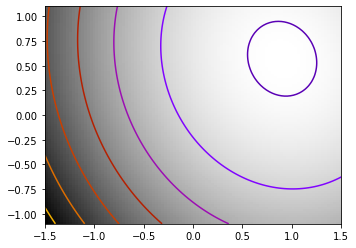

In [115]:
# pretty plot
plt.figure(1)
plt.clf()
Z = X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]
# Complete in the additional dimensions with zeros
Z = np.reshape(Z, (2, -1)).copy()
Z.resize((100, Z.shape[-1]))
Z = np.apply_along_axis(f, 0, Z)
Z = np.reshape(Z, X.shape)
plt.imshow(Z.T, cmap=plt.cm.gray_r, extent=[-1.5, 1.5, -1.1, 1.1],
          origin='lower')
plt.contour(X, Y, Z, cmap=plt.cm.gnuplot);

# compare different approaches

# a reference but slow solution
t0 = time.time()
x_ref = optimize.minimize(f, K[0], method='Powell').x
print(f'      Powell: time {time.time() - t0:.2f}')
f_ref = f(x_ref)

t0 = time.time()
x_bfgs = optimize.minimize(f, K[0], method='BFGS').x
print(f'        BFGS: time {time.time() - t0:.2f}, x error {la.norm(x_bfgs - x_ref):.2f}, f error {f(x_bfgs)-f_ref:.2f}')

t0 = time.time()
x_bfgs = optimize.minimize(f, K[0], jac=f_prime ,method='BFGS').x
print(f"BFGS with f': time {time.time() - t0:.2f}, x error {la.norm(x_bfgs - x_ref):.2f}, f error {f(x_bfgs)-f_ref:.2f}")

t0 = time.time()
x_newton = optimize.minimize(f, K[0], jac=f_prime, hess=hess, method="Newton-CG").x
print(f"  Newton-CG': time {time.time() - t0:.2f}, x error {la.norm(x_newton - x_ref):.2f}, f error {f(x_newton)-f_ref:.2f}")